# Step 0: Import libraries
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Input portfolio details
---

In [2]:
# Insert investments as a list
portfolio = ['Barclays 1', 'Barclays 2', 'NatWest', 'Paragon', 'Monzo', 'Blue Rewards']

# Annual interest rate for each investment. 
# Use AER% if interest compounding is considered; Use gross otherwise.
annual_interest_rates = [0.0541, 0.0525, 0.0617, 0.045, 0.041, 0.05]

# Set the working capital
starting_capital = [10000, 10000, 150, 25000, 1000, 5000]

# Set monthly contribution for fixed rate bonds. Set 0 for fixed-rate bonds.
monthly_contribution = [0, 0, 150, 550, 0, 0]

# Number of years
years = 2

# Savings goal
savings_goal = 80000

# Intervals to evaluate [year]
interval = 0.25

# Step 2: Check inputs

In [3]:
# Ensure all inputs are coherent
if len(portfolio) != len(annual_interest_rates):
    # Check for annual interest rate 
    raise ValueError("An annual interest rate is needed for each portfolio.")
    
elif len(portfolio) != len(starting_capital):
    # Check for starting capital
    raise ValueError("An starting capital is needed for each portfolio.")
        
elif len(portfolio) != len(monthly_contribution):
    # Check for monthly contribution
    raise ValueError("An monthly contribution is needed for each portfolio.")
                             
elif years == 0 or savings_goal==0 or interval ==0:
    # Check for singular inputs
    raise ValueError("Include the years to project, savings goal and the interval of analysis.")
                     
else:
    print('Proceed with analysis.')

Proceed with analysis.


# Step 3: Calculate the compounding effect on portfolio
---

In [4]:
# Initial variables
final_amount = dict()
list_years =list(np.asarray(np.arange(0,interval + years, interval)))
total_amount = np.zeros(len(list_years))

# Calculate the earnings for each investments
for i in range(len(portfolio)):
    portfolio_earnings = []
    for j in range(len(list_years)):
        
        # Calculate the earnings each year 
        capital_earnings = starting_capital[i]*(1+annual_interest_rates[i]/12)**(list_years[j]*12)
        monthly_earnings = monthly_contribution[i]*(((1+annual_interest_rates[i]/12)**(list_years[j]*12))-1)/(annual_interest_rates[i]/12)

        # Total both capital and monthly earnings
        portfolio_earnings.append(capital_earnings + monthly_earnings)
    
    # Store evolution of compounding in a dictionary
    total_amount = [x + y for x, y in zip(total_amount, portfolio_earnings)]
    final_amount[portfolio[i]] = portfolio_earnings
    
final_amount['Final portfolio'] = total_amount
portfolio += ['Final portfolio']



# Step 4: Tabulate results
---

In [5]:
# Create dataframe of results
df = pd.DataFrame.from_dict(final_amount)
df = df.set_index([pd.Index(list_years)]) 

# Insert new column for annual income
annual_income = [j-i for i, j in zip(total_amount[:-1], total_amount[1:])]
df ['Interval savings [' + str(interval) + ' years]'] = [0] + annual_income

# Insert new column for difference to savings goal
diff_savings = savings_goal - df['Final portfolio']
diff_savings [diff_savings<0] = 'Achieved!'
df ['Amount to savings goal'] = diff_savings

# Output
df

,Barclays 1,Barclays 2,NatWest,Paragon,Monzo,Blue Rewards,Final portfolio,Interval savings [0.25 years],Amount to savings goal
0.00,10000.000000,10000.000000,150.000000,25000.000000,1000.000000,5000.000000,51150.000000,0.000000,28850.000000
0.25,10135.860668,10131.825056,604.643382,26938.501240,1010.285061,5062.760778,53883.876186,2733.876186,26116.123814
0.50,10273.567149,10265.387897,1066.335759,28898.892502,1020.675904,5126.309340,56651.168550,2767.292364,23348.831450
0.75,10413.144519,10400.711430,1535.186420,30881.420973,1031.173618,5190.655573,59452.292532,2801.123982,20547.707468
1.00,10554.618196,10537.818867,2011.306350,32886.336632,1041.779301,5255.809489,62287.668836,2835.376304,17712.331164
1.25,10698.013945,10676.733724,2494.808257,34913.892280,1052.494064,5321.781228,65157.723498,2870.054661,14842.276502
1.50,10843.357877,10817.479826,2985.806592,36964.343574,1063.319030,5388.581055,68062.887953,2905.164456,11937.112047
1.75,10990.676462,10960.081314,3484.417585,39037.949056,1074.255330,5456.219363,71003.599111,2940.711158,8996.400889
2.00,11139.996527,11104.562648,3990.759266,41134.970189,1085.304112,5524.706678,73980.299419,2976.700308,6019.700581


# Step 5: Visualization
---

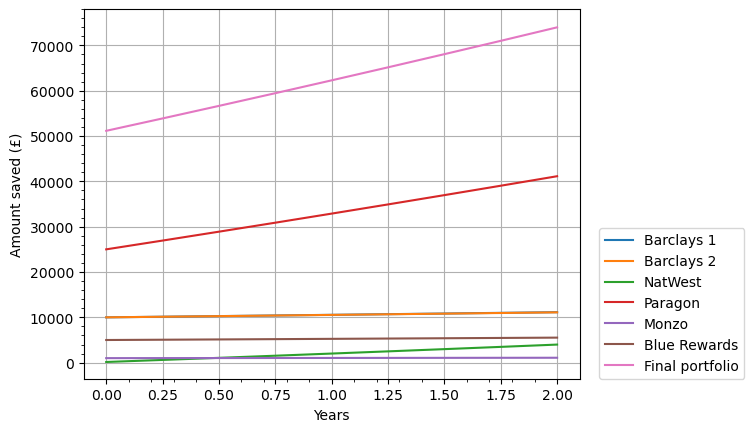

In [6]:
# Plot for all portfolios

fig, ax = plt.subplots()

for i in range(len(portfolio)):
    plt.plot(list_years, final_amount[portfolio[i]], label = portfolio[i])


plt.xlabel('Years')
plt.ylabel('Amount saved (£)')
plt.legend(loc=(1.04, 0))
x_ticks = np.arange(0, years, 0.1)
y_ticks = np.arange(0, savings_goal, 2000)
ax.set_xticks(x_ticks, minor=True)
ax.set_yticks(y_ticks, minor=True)
plt.grid()
plt.show()